In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk membagi data
from sklearn.model_selection import train_test_split

# library untuk evaluasi hasil prediksi
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

# library untuk bebrapa model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.feature_selection import SelectFromModel

# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# library untuk menggabungkan beberapa algoritme
from imblearn.pipeline import Pipeline
# library untuk menyeimbangkan data
from imblearn.over_sampling import SMOTE

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer
# import category_encoders as ce

from sklearn.calibration import CalibratedClassifierCV

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
print(df_train.shape)
print(df_test.shape)

(11153, 22)
(6000, 21)


In [6]:
df_train.head(15)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,level_1,0.00,1990,28,7,9,4,0,0,48.46,0.0,0
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,level_1,0.00,1988,29,8,6,2,8,0,60.38,0.0,0
7,JG05,2.828427,PG06,2.236068,1.581139,RM_type_C,2,1968,Y,2,level_1,0.00,1987,29,6,8,1,3,4,14.71,0.0,0
8,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,1,1989,Y,0,level_1,3.01,2007,3,2,2,0,9,0,26.76,0.0,0
9,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,2,1991,N,0,level_1,4.19,2009,3,2,2,0,3,0,41.45,0.0,1


In [7]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0


# EDA

In [8]:
def understand(df):
    
    print("Data Dimension: \n",df.shape,"\n")
    df_summary = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['missing'])
    df_summary.sort_values(by='missing',ascending=False,inplace=True)
    df_summary['missing num']=df.isnull().sum()
    df_summary['data types']=df.dtypes
    
    return df_summary[df_summary['missing']>0]

In [9]:
understand(df_train)

Data Dimension: 
 (11153, 22) 



,missing,missing num,data types
Achievement_above_100%_during3quartal,0.008966,1,float64
Last_achievement_%,0.008966,1,float64


In [10]:
understand(df_train).index

Data Dimension: 
 (11153, 22) 



Index(['Achievement_above_100%_during3quartal', 'Last_achievement_%'], dtype='object')

In [11]:
understand(df_test)

Data Dimension: 
 (6000, 21) 



,missing,missing num,data types


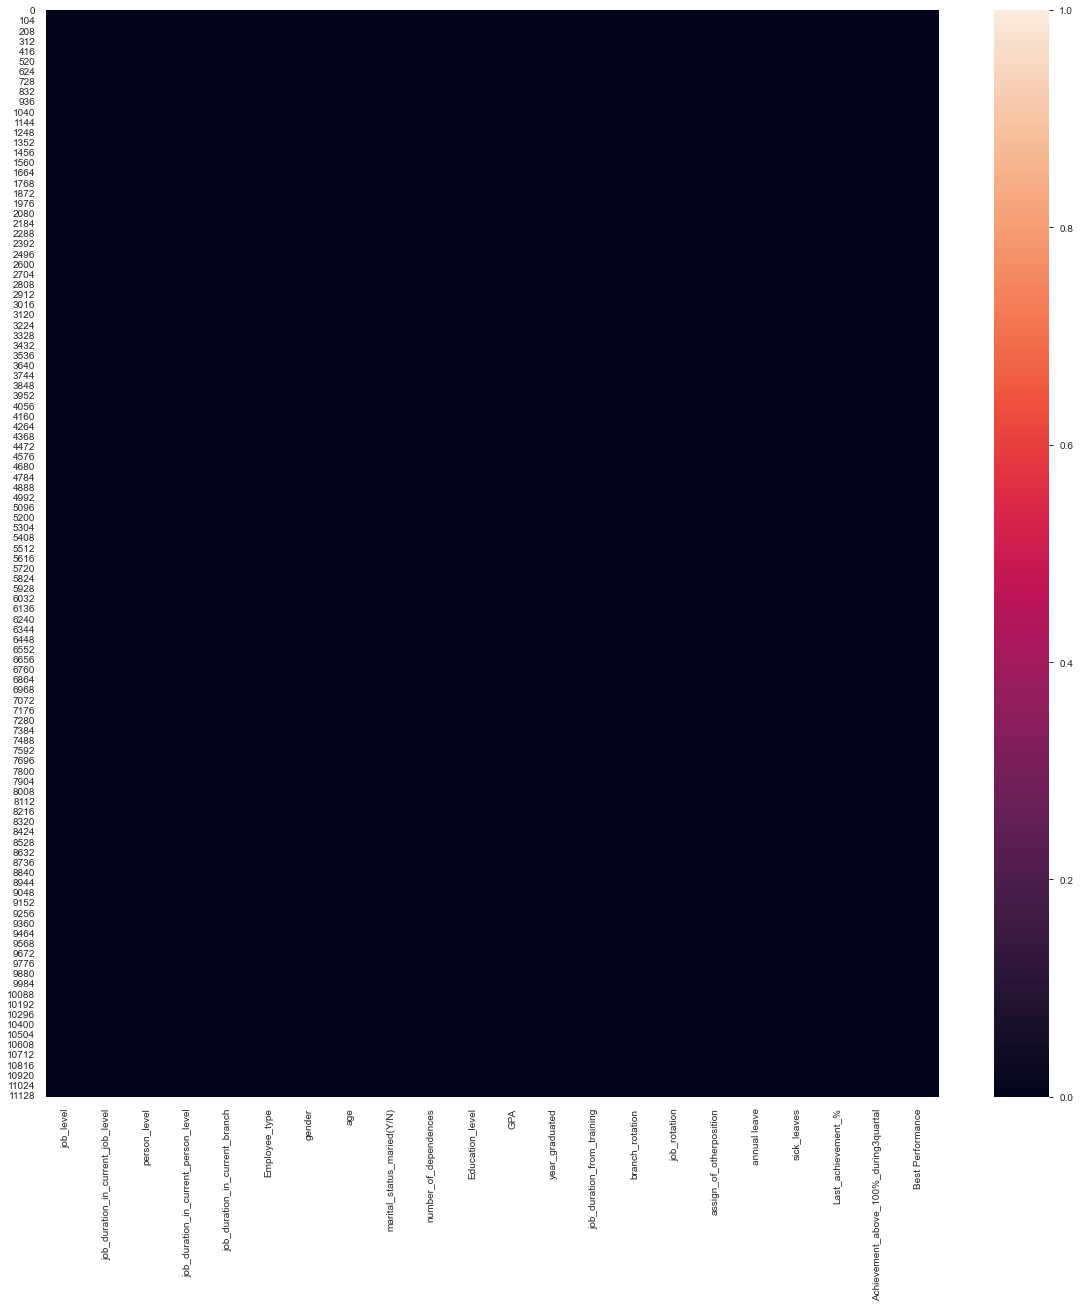

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.isnull())

In [13]:
df_train.dropna()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0


> ## Best Performance

In [14]:
df_train['Best Performance'].value_counts()

0    9516
1    1637
Name: Best Performance, dtype: int64

In [15]:
df_train.dropna()['Best Performance'].value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

In [16]:
df_train[df_train['Achievement_above_100%_during3quartal'].isnull()]['Best Performance'].value_counts()

0    1
Name: Best Performance, dtype: int64

> ## Object Var 

In [17]:
object_var = df_train.columns[df_train.dtypes == object]

In [18]:
for i in object_var:
    print(df_train[i].value_counts().sort_index(),'\n')

JG03       36
JG04    10413
JG05      704
Name: job_level, dtype: int64 

PG01      19
PG02      16
PG03    9655
PG04     757
PG05     308
PG06     378
PG07      19
PG08       1
Name: person_level, dtype: int64 

RM_type_A    7287
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64 

N    1652
Y    9501
Name: marital_status_maried(Y/N), dtype: int64 

level_0       1
level_1     140
level_2       4
level_3    1743
level_4    9222
level_5      43
Name: Education_level, dtype: int64 



In [19]:
for i in object_var:
    print(df_test[i].value_counts().sort_index(),'\n')

JG03      11
JG04    5616
JG05     372
JG06       1
Name: job_level, dtype: int64 

PG01       6
PG02       5
PG03    5211
PG04     403
PG05     159
PG06     203
PG07      13
Name: person_level, dtype: int64 

RM_type_A    3875
RM_type_B    1831
RM_type_C     294
Name: Employee_type, dtype: int64 

N     890
Y    5110
Name: marital_status_maried(Y/N), dtype: int64 

level_0       1
level_1      75
level_2       2
level_3     944
level_4    4950
level_5      28
Name: Education_level, dtype: int64 



> ## Year

In [20]:
df_train['year_graduated'].value_counts()

2011    1693
2010    1531
2012    1339
2009    1204
2008    1069
2013     875
2007     670
2014     616
2006     421
2005     295
2004     278
2003     255
2002     172
2015     163
2001     119
2000      67
1996      46
2016      41
1999      39
1995      31
2017      29
1998      28
1994      22
1992      17
1987      15
1993      15
1988      13
1997      13
1985      12
1989      12
1991      12
2018      10
1990       9
1986       8
2019       5
1983       4
1984       4
1982       1
Name: year_graduated, dtype: int64

In [21]:
df_train['year_graduated'].value_counts().sort_index()

1982       1
1983       4
1984       4
1985      12
1986       8
1987      15
1988      13
1989      12
1990       9
1991      12
1992      17
1993      15
1994      22
1995      31
1996      46
1997      13
1998      28
1999      39
2000      67
2001     119
2002     172
2003     255
2004     278
2005     295
2006     421
2007     670
2008    1069
2009    1204
2010    1531
2011    1693
2012    1339
2013     875
2014     616
2015     163
2016      41
2017      29
2018      10
2019       5
Name: year_graduated, dtype: int64

In [22]:
df_test['year_graduated'].value_counts().sort_index()

1984      1
1985      1
1986      8
1987      6
1988      8
1989      5
1990      6
1991      4
1992      6
1993     13
1994     17
1995     10
1996     15
1997      6
1998     19
1999     23
2000     32
2001     64
2002    116
2003    118
2004    151
2005    163
2006    212
2007    339
2008    556
2009    697
2010    816
2011    932
2012    756
2013    463
2014    316
2015     76
2016     23
2017     15
2018      5
2019      1
2020      1
Name: year_graduated, dtype: int64

In [23]:
df_train['Education_level'].value_counts()

level_4    9222
level_3    1743
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [24]:
df_train[df_train['GPA'] == 0]['Education_level'].value_counts()

level_4    1716
level_3     321
level_1     105
level_5       4
level_2       2
Name: Education_level, dtype: int64

In [25]:
df_train[df_train['GPA'] == 0].shape

(2148, 22)

In [26]:
df_test[df_test['GPA'] == 0].shape

(1165, 21)

> ## Numeric Var

In [27]:
numeric_var = df_train.columns[df_train.dtypes != object]

In [28]:
numeric_var

Index(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'gender', 'age',
       'number_of_dependences', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance'],
      dtype='object')

In [29]:
df_train[numeric_var].describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,1.433208,1.349218,1.034646,1.735587,1985.837084,0.995517,3.176195,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,0.431086,0.324660,0.416723,0.441040,4.632214,0.881103,13.321687,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E86FB4240>,
      dtype=object)

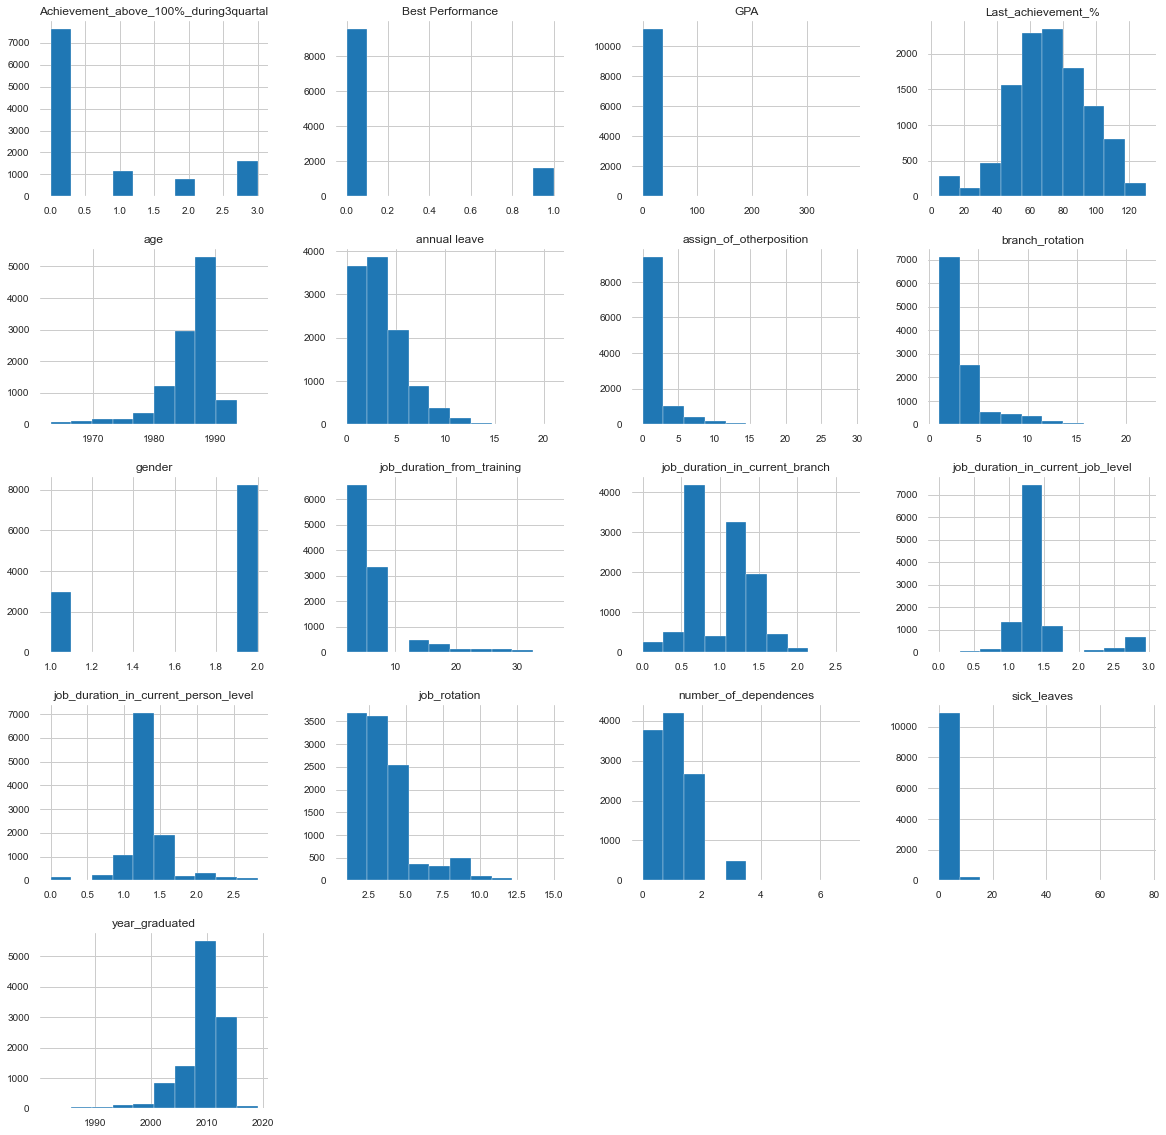

In [30]:
df_train[numeric_var].hist(figsize = (20,20))

In [31]:
# df_test[numeric_var].hist(figsize = (20,20))

In [32]:
# numeric_discrete = ['age', 'number_of_dependences',
#        'number_of_dependences (male)', 'number_of_dependences (female)', 'GPA',
#        'branch_rotation', 'job_rotation', 'assign_of_otherposition',
#        'annual leave', 'sick_leaves', 'Achievement_above_100%_during3quartal']

> ## Age

In [33]:
df_train['age'].value_counts()

1988    1558
1987    1473
1986    1348
1989    1323
1985     954
1990     926
1984     654
1991     511
1983     472
1982     286
1981     240
1980     228
1992     192
1979     154
1978     121
1977      92
1976      73
1993      55
1975      55
1974      47
1973      45
1968      44
1969      41
1971      38
1970      38
1972      35
1967      35
1964      29
1965      27
1966      25
1994      16
1995       7
1963       6
1996       4
1997       1
Name: age, dtype: int64

> ## GPA

In [34]:
df_train['GPA'].value_counts()

0.00     2148
3.00      382
3.01      229
3.10      199
3.03      186
         ... 
75.00       1
2.31        1
2.54        1
22.00       1
2.10        1
Name: GPA, Length: 216, dtype: int64

In [35]:
df_train['GPA'].describe()

count    11153.000000
mean         3.176195
std         13.321687
min          0.000000
25%          2.820000
50%          3.070000
75%          3.270000
max        378.000000
Name: GPA, dtype: float64

In [36]:
np.sort(df_train[~df_train['GPA'].isnull()]['GPA'])

array([  0.,   0.,   0., ..., 331., 368., 378.])

# Job Level

In [37]:
df_train.head(10)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,level_1,0.00,1990,28,7,9,4,0,0,48.46,0.0,0
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,level_1,0.00,1988,29,8,6,2,8,0,60.38,0.0,0
7,JG05,2.828427,PG06,2.236068,1.581139,RM_type_C,2,1968,Y,2,level_1,0.00,1987,29,6,8,1,3,4,14.71,0.0,0
8,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,1,1989,Y,0,level_1,3.01,2007,3,2,2,0,9,0,26.76,0.0,0
9,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,2,1991,N,0,level_1,4.19,2009,3,2,2,0,3,0,41.45,0.0,1


In [38]:
df_train[df_train['job_duration_in_current_job_level'] < df_train['job_duration_in_current_person_level']]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
41,JG04,2.738613,PG04,2.828427,0.707107,RM_type_A,2,1965,Y,2,level_1,0.00,1986,30,5,10,0,10,11,28.33,0.0,0
81,JG05,1.936492,PG06,2.828427,1.224745,RM_type_A,2,1965,Y,3,level_1,0.00,1985,30,8,6,0,3,1,46.72,0.0,0
108,JG05,2.236068,PG06,2.828427,1.224745,RM_type_A,1,1969,Y,3,level_1,155.00,1988,30,7,7,0,6,0,73.24,0.0,0
126,JG04,2.565151,PG04,2.828427,1.581139,RM_type_A,1,1973,Y,3,level_1,0.00,1992,25,19,8,0,0,1,65.38,0.0,0
1311,JG04,2.465766,PG04,2.828427,0.707107,RM_type_C,1,1973,Y,1,level_3,2.70,1994,26,9,7,0,0,0,102.12,3.0,0
1811,JG05,2.613427,PG06,2.828427,0.707107,RM_type_A,1,1964,Y,2,level_3,0.00,1989,29,11,8,7,10,2,82.30,0.0,0
1866,JG05,2.598076,PG06,2.828427,1.682260,RM_type_A,1,1965,Y,3,level_3,0.00,1989,29,9,11,0,6,3,68.63,0.0,0
2133,JG04,0.648074,PG03,1.224745,0.707107,RM_type_B,2,1990,N,0,level_4,3.47,2013,3,2,2,0,1,4,13.77,0.0,0
3157,JG05,1.936492,PG07,2.500000,1.224745,RM_type_A,2,1978,Y,3,level_4,0.00,2002,16,13,8,1,3,0,13.40,1.0,0
3709,JG05,2.707397,PG06,2.828427,0.707107,RM_type_A,1,1968,Y,3,level_4,3.22,2004,31,9,6,4,2,0,86.84,2.0,1


In [39]:
pd.crosstab(df_test['job_level'],df_test['person_level'])

person_level,PG01,PG02,PG03,PG04,PG05,PG06,PG07
job_level,,,,,,,
JG03,6,5,0,0,0,0,0
JG04,0,0,5211,403,0,2,0
JG05,0,0,0,0,159,201,12
JG06,0,0,0,0,0,0,1


In [40]:
df_train[(df_train['job_level']=='JG04')&(df_train['person_level']=='PG04')]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
23,JG04,2.828427,PG04,2.828427,1.682260,RM_type_A,2,1964,Y,3,level_1,0.00,1983,34,9,9,0,3,2,46.56,0.0,0
41,JG04,2.738613,PG04,2.828427,0.707107,RM_type_A,2,1965,Y,2,level_1,0.00,1986,30,5,10,0,10,11,28.33,0.0,0
50,JG04,2.828427,PG04,2.236068,0.866025,RM_type_A,2,1969,Y,4,level_1,0.00,1987,28,13,8,1,3,0,88.74,2.0,0
73,JG04,2.828427,PG04,2.828427,1.224745,RM_type_A,1,1965,Y,2,level_1,0.00,1985,28,9,8,0,3,0,76.50,0.0,1
75,JG04,2.828427,PG04,2.121320,0.000000,RM_type_A,2,1976,Y,2,level_1,0.00,1995,23,8,9,2,0,0,45.55,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,JG04,2.397916,PG04,1.224745,1.224745,RM_type_A,1,1980,Y,3,level_5,3.34,2006,14,8,6,0,3,3,45.50,0.0,0
11120,JG04,2.465766,PG04,1.732051,0.000000,RM_type_C,1,1982,Y,1,level_5,3.35,2010,13,11,8,0,12,14,65.13,1.0,1
11125,JG04,2.814249,PG04,2.000000,0.574456,RM_type_A,2,1986,Y,0,level_5,3.63,2017,8,7,4,0,6,2,58.80,0.0,0
11136,JG04,2.828427,PG04,1.224745,0.412311,RM_type_A,2,1978,Y,2,level_5,3.19,2005,15,10,8,6,8,1,60.10,1.0,1


# Anomaly

> ## Eduacation

In [41]:
df_train['Education_level'].value_counts()

level_4    9222
level_3    1743
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [42]:
df_train['Education_level'].isnull().sum()

0

In [43]:
df_train[['Education_level','GPA']][df_train['Education_level'] == 'level_0']

,Education_level,GPA
0,level_0,2.86


In [44]:
df_train[['Education_level','GPA']][df_train['Education_level'] == 'level_1'].describe()

,GPA
count,140.000000
mean,6.766000
std,18.977287
min,0.000000
25%,0.000000
50%,0.000000
75%,0.740000
max,155.000000


In [45]:
df_train[['Education_level','GPA']][df_train['GPA']>50]

,Education_level,GPA
68,level_1,75.00
78,level_1,53.06
108,level_1,155.00
134,level_1,66.00
1308,level_3,293.00
1986,level_4,285.00
2868,level_4,303.00
3560,level_4,327.00
4300,level_4,318.00
4950,level_4,330.00


In [46]:
df_train[['Education_level','GPA']][df_train['GPA']>4]

,Education_level,GPA
1,level_1,7.28
4,level_1,7.20
9,level_1,4.19
12,level_1,8.30
15,level_1,6.82
16,level_1,7.82
17,level_1,7.00
21,level_1,8.69
36,level_1,45.00
37,level_1,45.29


In [47]:
df_test[['Education_level','GPA']][df_test['GPA']>4]

,Education_level,GPA
160,level_4,312.00
344,level_4,294.00
1153,level_1,8.29
1200,level_1,8.50
1573,level_4,353.00
1608,level_4,270.00
1747,level_4,310.00
1956,level_1,48.53
2674,level_1,32.13
2867,level_4,296.00


In [48]:
df_train[df_train['GPA'] == 0]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.0,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.0,1987,29,11,6,0,4,10,47.42,0.0,1
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,level_1,0.0,1990,28,7,9,4,0,0,48.46,0.0,0
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,level_1,0.0,1988,29,8,6,2,8,0,60.38,0.0,0
7,JG05,2.828427,PG06,2.236068,1.581139,RM_type_C,2,1968,Y,2,level_1,0.0,1987,29,6,8,1,3,4,14.71,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,JG04,2.828427,PG04,2.449490,1.224745,RM_type_A,2,1968,Y,1,level_4,0.0,1996,22,8,7,2,3,0,99.38,3.0,0
11115,JG04,1.118034,PG03,1.118034,1.526434,RM_type_B,1,1989,Y,0,level_5,0.0,2014,2,1,2,0,5,1,41.53,0.0,0
11127,JG04,1.224745,PG03,1.224745,0.000000,RM_type_B,2,1982,Y,1,level_5,0.0,2009,6,4,2,0,4,0,52.74,0.0,0
11135,JG04,1.224745,PG03,1.224745,0.707107,RM_type_B,1,1986,N,0,level_5,0.0,2013,4,3,2,0,2,0,39.00,0.0,0


> ## Age

In [49]:
df_test['age'].value_counts()

1987    838
1988    819
1989    757
1986    643
1985    535
1990    503
1984    361
1991    285
1983    215
1982    150
1981    142
1979    116
1992    113
1980    111
1978     87
1977     44
1993     32
1976     28
1971     27
1975     25
1970     22
1968     21
1972     19
1973     19
1974     18
1965     15
1967     15
1969     13
1994     10
1966      8
1964      6
1963      2
1995      1
Name: age, dtype: int64

In [50]:
df_train['age'].value_counts()

1988    1558
1987    1473
1986    1348
1989    1323
1985     954
1990     926
1984     654
1991     511
1983     472
1982     286
1981     240
1980     228
1992     192
1979     154
1978     121
1977      92
1976      73
1993      55
1975      55
1974      47
1973      45
1968      44
1969      41
1971      38
1970      38
1972      35
1967      35
1964      29
1965      27
1966      25
1994      16
1995       7
1963       6
1996       4
1997       1
Name: age, dtype: int64

> ## Year Graduated

In [51]:
df_train['year_graduated'].value_counts().sort_index()

1982       1
1983       4
1984       4
1985      12
1986       8
1987      15
1988      13
1989      12
1990       9
1991      12
1992      17
1993      15
1994      22
1995      31
1996      46
1997      13
1998      28
1999      39
2000      67
2001     119
2002     172
2003     255
2004     278
2005     295
2006     421
2007     670
2008    1069
2009    1204
2010    1531
2011    1693
2012    1339
2013     875
2014     616
2015     163
2016      41
2017      29
2018      10
2019       5
Name: year_graduated, dtype: int64

> ## dependents

In [52]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance'],
      dtype='object')

> ## Leave

In [53]:
df_train[['annual leave','sick_leaves']].describe()

,annual leave,sick_leaves
count,11153.000000,11153.000000
mean,3.664216,1.100152
std,2.652648,2.714525
min,0.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,21.000000,77.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E87CCDBE0>,
      dtype=object)

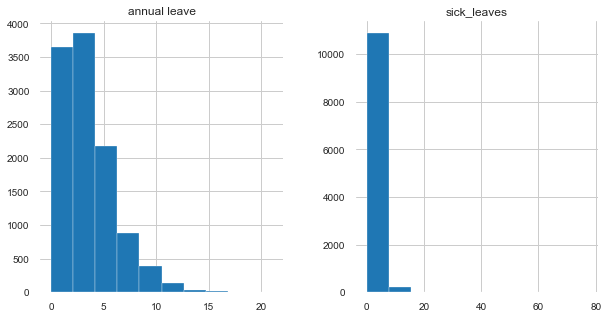

In [54]:
df_train[['annual leave','sick_leaves']].hist(figsize = (10,5))

In [55]:
df_train[['annual leave','sick_leaves']].sort_values(by = 'annual leave').tail(20)

,annual leave,sick_leaves
6795,15,0
643,15,0
1203,15,15
3891,15,0
2495,15,4
5004,15,0
258,15,0
1164,15,0
1166,16,9
6983,16,0


In [56]:
df_train[['annual leave','sick_leaves']].sort_values(by = 'sick_leaves').tail(20)

,annual leave,sick_leaves
4192,2,23
11042,0,25
4140,1,26
8482,3,27
2999,5,28
9304,3,28
8924,3,29
4078,7,29
3369,3,30
2979,9,30


> ## Achievement

# Data Prepaparation

In [57]:
df_train_prep1 = df_train.copy()
df_test_prep1 = df_test.copy()

In [58]:
# df_train_prep1 = df_train_prep1.dropna()
# df_train_prep1 = df_train_prep1[~df_train_prep1['Education_level'].isnull()]

In [59]:
df_train_prep1.shape

(11153, 22)

## Training Set

ACHIEVEMENT

In [60]:
df_train_prep1['Achievement_above_100%_during3quartal'].fillna(0, inplace = True)

GPA

In [61]:
df_train_prep1['GPA'] = np.where(df_train_prep1['GPA']>100,df_train_prep1['GPA']/100,df_train_prep1['GPA'])
df_train_prep1['GPA'] = np.where(df_train_prep1['Education_level'].isin(['level_0','level_1']),0,df_train_prep1['GPA'])
df_train_prep1['GPA'] = np.where((df_train_prep1['GPA']==0)&(df_train_prep1['Education_level'] == 'level_4'),3,df_train_prep1['GPA'])

Job duration

RESULT

In [62]:
df_train_prep1.shape

(11153, 22)

In [63]:
df_train_prep1.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,0.0,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,0.0,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.0,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.0,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,0.0,1985,30,9,8,2,3,0,47.18,0.0,0


> ## Test Set

In [64]:
df_test_prep1['GPA'] = np.where(df_test['GPA']>100,df_test['GPA']/100,df_test['GPA'])
df_test_prep1['GPA'] = np.where(df_test_prep1['Education_level'].isin(['level_0','level_1']),0,df_test_prep1['GPA'])
df_test_prep1['GPA'] = np.where((df_test_prep1['GPA']==0)&(df_test_prep1['Education_level'] == 'level_4'),3,df_test_prep1['GPA'])

In [65]:
df_test_prep1.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,3.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0


In [66]:
for i in object_var:
    print('train\n')
    print(df_train[i].value_counts().sort_index()/df_train[~df_train[i].isnull()].shape[0],'\n')
    print('test\n')
    print(df_test[i].value_counts().sort_index()/df_test.shape[0],'\n')

train

JG03    0.003228
JG04    0.933650
JG05    0.063122
Name: job_level, dtype: float64 

test

JG03    0.001833
JG04    0.936000
JG05    0.062000
JG06    0.000167
Name: job_level, dtype: float64 

train

PG01    0.001704
PG02    0.001435
PG03    0.865686
PG04    0.067874
PG05    0.027616
PG06    0.033892
PG07    0.001704
PG08    0.000090
Name: person_level, dtype: float64 

test

PG01    0.001000
PG02    0.000833
PG03    0.868500
PG04    0.067167
PG05    0.026500
PG06    0.033833
PG07    0.002167
Name: person_level, dtype: float64 

train

RM_type_A    0.653367
RM_type_B    0.303057
RM_type_C    0.043576
Name: Employee_type, dtype: float64 

test

RM_type_A    0.645833
RM_type_B    0.305167
RM_type_C    0.049000
Name: Employee_type, dtype: float64 

train

N    0.148122
Y    0.851878
Name: marital_status_maried(Y/N), dtype: float64 

test

N    0.148333
Y    0.851667
Name: marital_status_maried(Y/N), dtype: float64 

train

level_0    0.000090
level_1    0.012553
level_2    0.000359

In [67]:
for i in object_var:
    print('train\n')
    print(df_train_prep1[i].value_counts().sort_index()/df_train_prep1[~df_train_prep1[i].isnull()].shape[0],'\n')
    print('test\n')
    print(df_test_prep1[i].value_counts().sort_index()/df_test_prep1.shape[0],'\n')

train

JG03    0.003228
JG04    0.933650
JG05    0.063122
Name: job_level, dtype: float64 

test

JG03    0.001833
JG04    0.936000
JG05    0.062000
JG06    0.000167
Name: job_level, dtype: float64 

train

PG01    0.001704
PG02    0.001435
PG03    0.865686
PG04    0.067874
PG05    0.027616
PG06    0.033892
PG07    0.001704
PG08    0.000090
Name: person_level, dtype: float64 

test

PG01    0.001000
PG02    0.000833
PG03    0.868500
PG04    0.067167
PG05    0.026500
PG06    0.033833
PG07    0.002167
Name: person_level, dtype: float64 

train

RM_type_A    0.653367
RM_type_B    0.303057
RM_type_C    0.043576
Name: Employee_type, dtype: float64 

test

RM_type_A    0.645833
RM_type_B    0.305167
RM_type_C    0.049000
Name: Employee_type, dtype: float64 

train

N    0.148122
Y    0.851878
Name: marital_status_maried(Y/N), dtype: float64 

test

N    0.148333
Y    0.851667
Name: marital_status_maried(Y/N), dtype: float64 

train

level_0    0.000090
level_1    0.012553
level_2    0.000359

# Feature Engineering

FE New variabel

In [68]:
# new_leaves (example)
df_train_prep1['total leave'] = df_train_prep1['annual leave'] + df_train_prep1['sick_leaves']
df_test_prep1['total leave'] = df_test_prep1['annual leave'] + df_test_prep1['sick_leaves']

# another ex. total transaksi/number of transaksion + - * /, ---> rule

Age

In [69]:
def age_2(x):
    if x <= 35:
        return 'ambis'
    elif x > 35:
        return 'non-ambis'
    
def age_3(x):
    if x <= 25:
        return 1
    elif x <= 35:
        return 2
    elif x <= 45:
        return 3
    elif x <= 55:
        return 4
    elif x <= 65:
        return 5

In [70]:
df_train_prep1['age2'] = 2020 - df_train_prep1['age']
df_train_prep1['age2'] = df_train_prep1['age2'].apply(age_2)
df_train_prep1['age2'].value_counts().sort_index()

ambis        8368
non-ambis    2785
Name: age2, dtype: int64

In [71]:
df_test_prep1['age2'] = 2020 - df_test_prep1['age']
df_test_prep1['age2'] = df_test_prep1['age2'].apply(age_2)
df_test_prep1['age2'].value_counts().sort_index()

ambis        4536
non-ambis    1464
Name: age2, dtype: int64

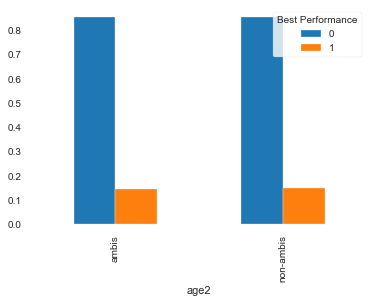

In [72]:
pd.crosstab(df_train_prep1['age2'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

In [73]:
df_train_prep1['age3'] = 2020 - df_train_prep1['age']
df_train_prep1['age3'] = df_train_prep1['age3'].apply(age_3)
df_train_prep1['age3'].value_counts().sort_index()

1      12
2    8356
3    2375
4     375
5      35
Name: age3, dtype: int64

In [74]:
df_test_prep1['age3'] = 2020 - df_test_prep1['age']
df_test_prep1['age3'] = df_test_prep1['age3'].apply(age_3)
df_test_prep1['age3'].value_counts().sort_index()

1       1
2    4535
3    1279
4     177
5       8
Name: age3, dtype: int64

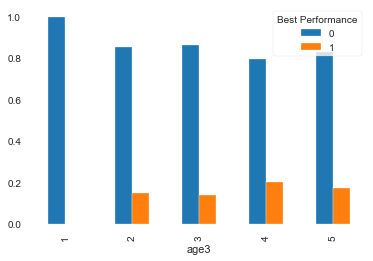

In [75]:
pd.crosstab(df_train_prep1['age3'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

Year Graduated

In [76]:
def year_graduated_2(x):
    if x < 2000:
        return 'old'
    elif x < 2020:
        return 'new'
    else:
        return 'not grad'

In [77]:
df_train_prep1['year_graduated2'] = df_train_prep1['year_graduated'].apply(year_graduated_2)
df_test_prep1['year_graduated2'] = df_test_prep1['year_graduated'].apply(year_graduated_2)

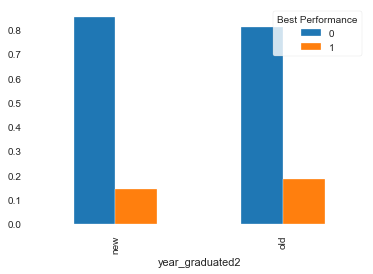

In [78]:
pd.crosstab(df_train_prep1['year_graduated2'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

Total rotation

In [79]:
df_train_prep1['total_rotation'] = df_train_prep1['branch_rotation'] + df_train_prep1['job_rotation'] + df_train_prep1['assign_of_otherposition']
df_test_prep1['total_rotation'] = df_test_prep1['branch_rotation'] + df_test_prep1['job_rotation'] + df_test_prep1['assign_of_otherposition']

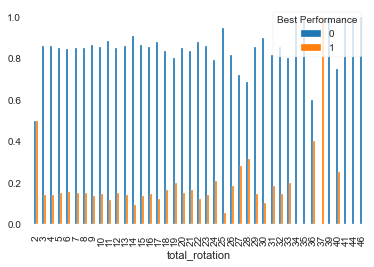

In [80]:
pd.crosstab(df_train_prep1['total_rotation'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

In Study

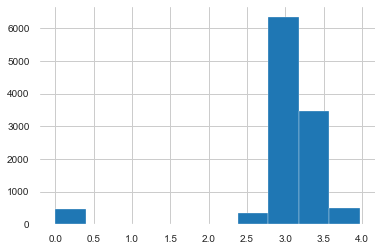

In [81]:
df_train_prep1['GPA'].hist()

In [82]:
df_train_prep1[(df_train_prep1['GPA'] == 0)&(df_train_prep1['Education_level'].isin(['level_3','level_4','level_5']))]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,total leave,age2,age3,year_graduated2,total_rotation
150,JG04,1.385641,PG03,1.385641,0.959166,RM_type_A,2,1984,Y,0,level_3,0.0,2010,7,4,4,11,2,0,35.53,0.0,0,2,non-ambis,3,new,19
176,JG04,0.707107,PG03,0.707107,1.442221,RM_type_A,1,1985,Y,0,level_3,0.0,2014,6,3,3,0,3,0,93.86,1.0,0,3,ambis,2,new,6
177,JG04,1.606238,PG03,1.606238,1.526434,RM_type_A,2,1986,Y,2,level_3,0.0,2007,6,3,3,0,1,1,84.16,0.0,0,2,ambis,2,new,6
178,JG04,1.352775,PG03,1.352775,0.412311,RM_type_A,2,1985,Y,2,level_3,0.0,2009,6,5,5,0,4,0,61.75,0.0,1,4,ambis,2,new,10
190,JG04,1.224745,PG03,1.224745,1.414214,RM_type_A,2,1988,Y,0,level_3,0.0,2014,3,2,3,0,9,0,41.58,0.0,0,9,ambis,2,new,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,JG04,1.191638,PG03,1.191638,1.581139,RM_type_A,2,1988,Y,0,level_3,0.0,2009,5,2,2,2,8,0,46.63,0.0,1,8,ambis,2,new,6
11115,JG04,1.118034,PG03,1.118034,1.526434,RM_type_B,1,1989,Y,0,level_5,0.0,2014,2,1,2,0,5,1,41.53,0.0,0,6,ambis,2,new,3
11127,JG04,1.224745,PG03,1.224745,0.000000,RM_type_B,2,1982,Y,1,level_5,0.0,2009,6,4,2,0,4,0,52.74,0.0,0,4,non-ambis,3,new,6
11135,JG04,1.224745,PG03,1.224745,0.707107,RM_type_B,1,1986,N,0,level_5,0.0,2013,4,3,2,0,2,0,39.00,0.0,0,2,ambis,2,new,5


In [83]:
df_train_prep1['in study'] = np.where((df_train_prep1['GPA'] == 0)&(df_train_prep1['Education_level'].isin(['level_3','level_4','level_5'])),'study','finish')
df_test_prep1['in study'] = np.where((df_test_prep1['GPA'] == 0)&(df_test_prep1['Education_level'].isin(['level_3','level_4','level_5'])),'study','finish')

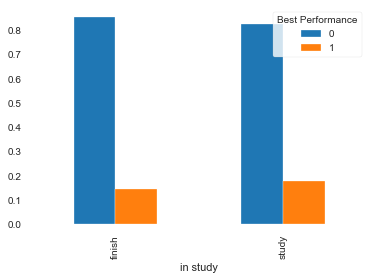

In [84]:
pd.crosstab(df_train_prep1['in study'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

person level up

In [85]:
df_train_prep1['person level up'] = np.where(df_train_prep1['job_duration_in_current_job_level']>df_train_prep1['job_duration_in_current_person_level'],'up','stay')
df_test_prep1['person level up'] = np.where(df_test_prep1['job_duration_in_current_job_level']>df_test_prep1['job_duration_in_current_person_level'],'up','stay')

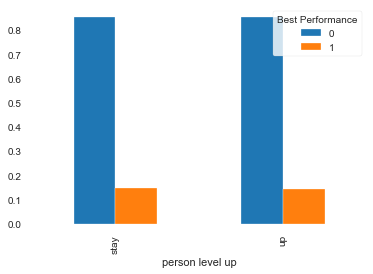

In [86]:
pd.crosstab(df_train_prep1['person level up'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

leava or sick

In [226]:
df_train_prep1['sick_vs_leaves'] = np.where(df_train_prep1['annual leave']>df_train_prep1['sick_leaves'],'leave',np.where(df_train_prep1['annual leave']==df_train_prep1['sick_leaves'],'sama','sick'))
df_test_prep1['sick_vs_leaves'] = np.where(df_test_prep1['annual leave']>df_test_prep1['sick_leaves'],'leave',np.where(df_test_prep1['annual leave']==df_test_prep1['sick_leaves'],'sama','sick'))

In [227]:
pd.crosstab(df_train_prep1['sick_vs_leaves'],df_train_prep1['Best Performance'], normalize = 0)

Best Performance,0,1
sick_vs_leaves,,
leave,0.857309,0.142691
sama,0.846154,0.153846
sick,0.831461,0.168539


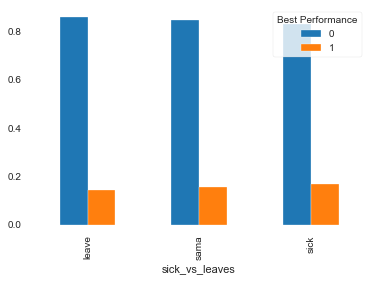

In [228]:
pd.crosstab(df_train_prep1['sick_vs_leaves'],df_train_prep1['Best Performance'], normalize = 0).plot(kind = 'bar')

age when graduated

In [277]:
df_train_prep1['Education_level'].value_counts()

level_4    9222
level_3    1743
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [274]:
df_train_prep1['age when graduated'] = df_train_prep1['year_graduated'] - df_train_prep1['age']
df_train_prep1['age when graduated2'] = np.where(df_train_prep1['Education_level'].isin(['level_4','level_3']),df_train_prep1['Education_level'].isin(['level_4','level_3'])*df_train_prep1['age when graduated'],0)

In [287]:
df_test_prep1['age when graduated'] = df_test_prep1['year_graduated'] - df_test_prep1['age']
df_test_prep1['age when graduated2'] = np.where(df_test_prep1['Education_level'].isin(['level_4','level_3']),df_test_prep1['Education_level'].isin(['level_4','level_3'])*df_test_prep1['age when graduated'],0)

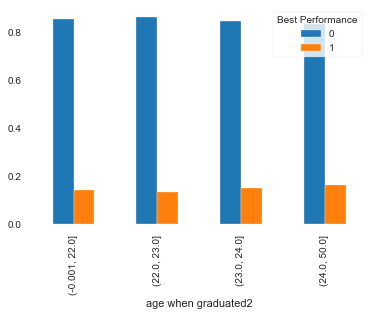

In [330]:
pd.crosstab(pd.qcut(df_train_prep1['age when graduated2'],4),df_train_prep1['Best Performance'],normalize = 0).plot(kind = 'bar')

age per dependencies

In [485]:
df_train_prep1['age per dependencies'] = (2020-df_train_prep1['age'])/(df_train_prep1['number_of_dependences']+1)
df_test_prep1['age per dependencies'] = (2020-df_test_prep1['age'])/(df_test_prep1['number_of_dependences']+1)

In [486]:
pd.crosstab(pd.qcut(df_train_prep1['age per dependencies'],4),df_train_prep1['Best Performance'],normalize = 0)

Best Performance,0,1
age per dependencies,,
"(6.749, 13.667]",0.864865,0.135135
"(13.667, 16.5]",0.857813,0.142187
"(16.5, 30.0]",0.844858,0.155142
"(30.0, 54.0]",0.845268,0.154732


age married male

In [337]:
df_train_prep1['marital_status_maried(Y/N)'].value_counts()

Y    9501
N    1652
Name: marital_status_maried(Y/N), dtype: int64

In [338]:
df_train_prep1['gender'].value_counts()

2    8204
1    2949
Name: gender, dtype: int64

In [339]:
pd.crosstab(df_train_prep1['marital_status_maried(Y/N)'],df_train_prep1['gender'])

gender,1,2
marital_status_maried(Y/N),,
N,501,1151
Y,2448,7053


In [344]:
df_train_prep1['age married male'] = (2020-df_train_prep1['age'])*(df_train_prep1['marital_status_maried(Y/N)'] == 'Y')*(df_train_prep1['gender']==1)
df_test_prep1['age married male'] = (2020-df_test_prep1['age'])*(df_test_prep1['marital_status_maried(Y/N)'] == 'Y')*(df_test_prep1['gender']==1)

In [353]:
pd.crosstab(pd.qcut(df_train_prep1[df_train_prep1['age married male']!=0]['age married male'],4),df_train_prep1[df_train_prep1['age married male']!=0]['Best Performance'],normalize = 0)

Best Performance,0,1
age married male,,
"(24.999, 32.0]",0.828283,0.171717
"(32.0, 34.0]",0.850082,0.149918
"(34.0, 37.0]",0.843177,0.156823
"(37.0, 57.0]",0.847670,0.152330


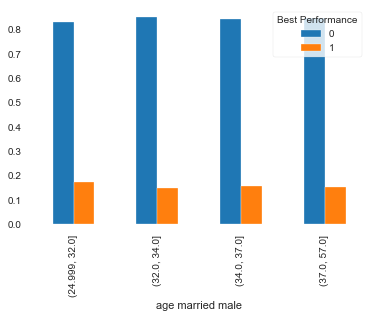

In [352]:
pd.crosstab(pd.qcut(df_train_prep1[df_train_prep1['age married male']!=0]['age married male'],4),df_train_prep1[df_train_prep1['age married male']!=0]['Best Performance'],normalize = 0).plot(kind = 'bar')

In [378]:
df_train_prep1['age married male']

0         0
1         0
2        50
3         0
4         0
         ..
11148     0
11149    32
11150     0
11151    33
11152     0
Name: age married male, Length: 11153, dtype: int64

In [381]:
df_train_prep1['papa muda'] = np.where((df_train_prep1['age married male']>=24.9)&(df_train_prep1['age married male']<=32),df_train_prep1['age married male'],0)
df_test_prep1['papa muda'] = np.where((df_test_prep1['age married male']>=24.9)&(df_test_prep1['age married male']<=32),df_test_prep1['age married male'],0)

age per dependencies papa muda

In [430]:
df_train_prep1['papa muda per tanggungan'] = df_train_prep1['papa muda']/(df_train_prep1['number_of_dependences']+1)
df_test_prep1['papa muda per tanggungan'] = df_test_prep1['papa muda']/(df_test_prep1['number_of_dependences']+1)

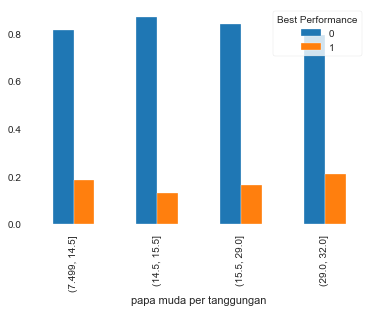

In [455]:
pd.crosstab(pd.qcut(df_train_prep1[df_train_prep1['papa muda per tanggungan']!=0]['papa muda per tanggungan'],4),df_train_prep1[df_train_prep1['papa muda per tanggungan']!=0]['Best Performance'],normalize = 0).plot(kind = 'bar')

for one hot

In [288]:
df_train_prep1['job_level_oh'] = df_train_prep1['job_level'] 
df_train_prep1['person_level_oh'] = df_train_prep1['person_level']

df_test_prep1['job_level_oh'] = df_test_prep1['job_level'] 
df_test_prep1['person_level_oh'] = df_test_prep1['person_level']

FE SKLEARN

In [289]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0


In [290]:
df_train_prep1.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance', 'total leave', 'age2', 'age3', 'year_graduated2',
       'total_rotation', 'in study', 'person level up', 'job_level_oh',
       'person_level_oh', 'sick_vs_leaves', 'age when graduated',
       'age when graduated2'],
      dtype='object')

In [291]:
object_var

Index(['job_level', 'person_level', 'Employee_type',
       'marital_status_maried(Y/N)', 'Education_level'],
      dtype='object')

In [292]:
numeric_var

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal',
 'year_graduated',
 'total leave',
 'total_rotation',
 'age when graduated',
 'age when graduated2']

In [293]:
df_train_prep1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,total leave,age2,age3,year_graduated2,total_rotation,in study,person level up,job_level_oh,person_level_oh,sick_vs_leaves,age when graduated,age when graduated2
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,0.00,2011,4,2,3,2,3,0,46.37,0.0,0,3,ambis,2,new,7,finish,stay,JG04,PG03,leave,26,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,0.00,2007,4,4,3,0,0,1,47.68,0.0,0,1,ambis,2,new,7,finish,stay,JG04,PG03,sick,18,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,3,non-ambis,4,old,25,finish,up,JG05,PG06,leave,19,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,14,non-ambis,4,old,17,finish,up,JG05,PG06,sick,20,0
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,0.00,1985,30,9,8,2,3,0,47.18,0.0,0,3,non-ambis,4,old,19,finish,stay,JG05,PG06,leave,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0,5,ambis,2,new,6,finish,stay,JG04,PG03,leave,30,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0,6,ambis,2,new,3,finish,stay,JG04,PG03,leave,27,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0,4,ambis,2,new,3,finish,stay,JG04,PG03,leave,26,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0,5,ambis,2,new,9,finish,stay,JG04,PG03,leave,25,0


In [540]:
new_var_one_hot = ['age2','age3','year_graduated2','in study','person level up','sick_vs_leaves']

one_hot_var = [
    'job_level_oh', 
    'person_level_oh', 
    'Employee_type', 
    'Education_level',
#     'Employee_status',   
    'gender', 
    'marital_status_maried(Y/N)'] + new_var_one_hot

ordinal_val = [
    'job_level',
    'person_level',
    'Education_level'
#     'achievement_target_1', 
#     'achievement_target_2'
]

new_var_num = ['year_graduated','total leave','total_rotation',
               'age when graduated','age when graduated2','papa muda',
               'papa muda per tanggungan','age per dependencies']

numeric_var = [
    'job_duration_in_current_job_level',   
    'job_duration_in_current_person_level',
    'job_duration_in_current_branch', 
    'age', 
    'number_of_dependences',
    'GPA',   
    'branch_rotation', 
    'job_rotation', 
    'assign_of_otherposition',   
    'annual leave', 
    'sick_leaves',
    'Last_achievement_%', 
    'Achievement_above_100%_during3quartal'] + new_var_num

In [541]:
# ordinal_mapping = [
#     {'col':'job_level',
#     'mapping':{None:0,'JG04':1,'JG05':2,'JG03':3,'JG06':4}},
#     {'col':'person_level',
#     'mapping':{None:0,'PG01':1,'PG02':2,'PG03':3,'PG04':4, 'PG05':5, 'PG06':6, 'PG07':7, 'PG08':8}},
#     {'col':'Education_level',
#     'mapping':{None:0,'level_0':1,'level_1':2,'level_2':3, 'level_3':4, 'level_4':5, 'level_5':6}}    
#     ]

# ordinal_encoder = ce.OrdinalEncoder(cols = ['job_level','person_level','Education_level'],mapping = ordinal_mapping)

one_hot_encoder_pipeline = Pipeline([
                                    ('one hot encoder',OneHotEncoder(handle_unknown = 'ignore'))
])

# numerical_pipeline = SimpleImputer(strategy = 'constant',fill_value = 0)

numerical_pipeline = Pipeline([
                                ('imputer',SimpleImputer(strategy = 'constant',fill_value = 0)),
                                ('bin',KBinsDiscretizer(encode = 'onehot',strategy = 'kmeans',n_bins=5))
])

transformer = ColumnTransformer([
    ('one hot encoder',one_hot_encoder_pipeline,one_hot_var),
#     ('ordinal encoder',ordinal_encoder,ordinal_val),
    ('numerical_pipeline',numerical_pipeline,numeric_var)
])

In [542]:
# ?KBinsDiscretizer

# Data Splitting

In [543]:
var_x = numeric_var + one_hot_var #+ ordinal_val

X = df_train_prep1[var_x]
X_sub = df_test_prep1[var_x]
y = df_train_prep1['Best Performance']

In [544]:
# seed = 1995
seed = 70621

X_trainval, X_test, y_trainval, y_test = train_test_split(X,y, stratify = y, test_size = 1500, random_state = seed)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, stratify = y_trainval, test_size = 1500, random_state = seed)

> # Model (Benchmark)

In [548]:
# ?XGBClassifier

In [549]:
rates = 0.2

model = XGBClassifier(
    learning_rate = rates,
    n_estimators = 100,
    max_depth = 5,
    min_child_weight = 6,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    random_state = 20)


# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

In [550]:
estimator.fit(X_train, y_train)

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_level_oh',
                                                   'person_level_oh',
                                                   'Employee_type',
                                                   'Education_level', 'gender',
                                                   'marital_status_maried(Y/N)',
                                                   'age2', 'age3',
                                                   'year_graduated2',
                                                   'in study',
                                                   'person level up'

In [551]:
y_prob_train = estimator.predict_proba(X_train)[:,1]
y_pred_train = np.where(y_prob_train > 0.13, 1, 0)

print('auc',roc_auc_score(y_train,y_prob_train),'\n')
print('classification report \n', classification_report(y_train,y_pred_train))

auc 0.5554003851876191 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6956
           1       0.15      1.00      0.26      1197

    accuracy                           0.15      8153
   macro avg       0.07      0.50      0.13      8153
weighted avg       0.02      0.15      0.04      8153



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [552]:
y_prob_val = estimator.predict_proba(X_val)[:,1]
y_pred_val = np.where(y_prob_val > 0.13, 1, 0)

print('auc',roc_auc_score(y_val,y_prob_val),'\n')
print('classification report \n', classification_report(y_val,y_pred_val))

auc 0.5436079545454545 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [553]:
estimator.fit(X_trainval, y_trainval)
y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


auc 0.5751065340909092 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Prediction

In [554]:
estimator.fit(X,y)

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_level_oh',
                                                   'person_level_oh',
                                                   'Employee_type',
                                                   'Education_level', 'gender',
                                                   'marital_status_maried(Y/N)',
                                                   'age2', 'age3',
                                                   'year_graduated2',
                                                   'in study',
                                                   'person level up'

In [555]:
y_pred_sub = estimator.predict_proba(X_sub)[:,1]
df_test['Best Performance'] = y_pred_sub
df_submission = df_test[['Best Performance']]

In [556]:
df_submission.reset_index().to_csv('submission v1 base.csv',index = False)

# Model Selection Manual

In [557]:
rates = 0.2

model = LogisticRegression(solver = 'newton-cg')

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

In [559]:
estimator.fit(X_train, y_train)

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_level_oh',
                                                   'person_level_oh',
                                                   'Employee_type',
                                                   'Education_level', 'gender',
                                                   'marital_status_maried(Y/N)',
                                                   'age2', 'age3',
                                                   'year_graduated2',
                                                   'in study',
                                                   'person level up'

In [560]:
y_prob_train = estimator.predict_proba(X_train)[:,1]
y_pred_train = np.where(y_prob_train > 0.13, 1, 0)

print('auc',roc_auc_score(y_train,y_prob_train),'\n')
print('classification report \n', classification_report(y_train,y_pred_train))

auc 0.6209941544488017 

classification report 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62      6956
           1       0.18      0.70      0.29      1197

    accuracy                           0.50      8153
   macro avg       0.54      0.58      0.45      8153
weighted avg       0.80      0.50      0.57      8153



In [561]:
y_prob_val = estimator.predict_proba(X_val)[:,1]
y_pred_val = np.where(y_prob_val > 0.13, 1, 0)

print('auc',roc_auc_score(y_val,y_prob_val),'\n')
print('classification report \n', classification_report(y_val,y_pred_val))

auc 0.5545703125 

classification report 
               precision    recall  f1-score   support

           0       0.88      0.45      0.59      1280
           1       0.17      0.64      0.26       220

    accuracy                           0.47      1500
   macro avg       0.52      0.54      0.43      1500
weighted avg       0.77      0.47      0.54      1500



In [562]:
y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5917933238636364 

classification report 
               precision    recall  f1-score   support

           0       0.90      0.46      0.61      1280
           1       0.18      0.70      0.29       220

    accuracy                           0.49      1500
   macro avg       0.54      0.58      0.45      1500
weighted avg       0.79      0.49      0.56      1500



# Model Selection

In [563]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

In [564]:
model_xgb = XGBClassifier(
    learning_rate = 0.05,
    n_estimators = 1000,
    max_depth = 5,
    min_child_weight = 4,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model_xgb = CalibratedClassifierCV(model)

model_logreg = LogisticRegression(solver = 'newton-cg')
model_knn = KNeighborsClassifier()
model_dtc = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
# model_svc = SVC(kernel = 'rbf')

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 5)

hyperparam_space = {
    'clf':[model_xgb, model_logreg, model_knn, model_dtc, model_rf]
}

grid_search_model = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [565]:
grid_search_model.fit(X_trainval, y_trainval)

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
            

In [566]:
print(grid_search_model.best_params_)
print(grid_search_model.best_score_)

{'clf': LogisticRegression(solver='newton-cg')}
0.5627476379565657


In [567]:
pd.DataFrame(grid_search_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.130388,0.129329,0.039871,0.005501,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.539521,0.556744,0.566059,0.553818,0.545408,0.552310,0.009189,2
1,2.962251,0.110984,0.041644,0.006721,LogisticRegression(solver='newton-cg'),{'clf': LogisticRegression(solver='newton-cg')},0.551582,0.548659,0.575032,0.571703,0.566762,0.562748,0.010681,1
2,0.775165,0.158810,2.521174,0.489732,KNeighborsClassifier(),{'clf': KNeighborsClassifier()},0.499464,0.490876,0.527054,0.524145,0.512513,0.510811,0.013933,5
3,1.507274,0.088904,0.045067,0.012015,DecisionTreeClassifier(),{'clf': DecisionTreeClassifier()},0.519032,0.519322,0.539344,0.497887,0.510070,0.517131,0.013580,4
4,7.580913,0.273989,0.069686,0.005003,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.538447,0.519497,0.576187,0.536243,0.551936,0.544462,0.018918,3


# Hyperparameter Tuning Logistic

In [568]:
one_hot_encoder_pipeline = Pipeline([
                                    ('one hot encoder',OneHotEncoder(handle_unknown = 'ignore'))
])

# numerical_pipeline = SimpleImputer(strategy = 'constant',fill_value = 0)

numerical_pipeline = Pipeline([
                                ('imputer',SimpleImputer(strategy = 'constant',fill_value = 0)),
                                ('bin',KBinsDiscretizer(encode = 'onehot',strategy = 'uniform'))
])

transformer = ColumnTransformer([
    ('one hot encoder',one_hot_encoder_pipeline,one_hot_var),
#     ('ordinal encoder',ordinal_encoder,ordinal_val),
    ('numerical_pipeline',numerical_pipeline,numeric_var)
])

In [569]:
# ?SelectFromModel

In [570]:
model = LogisticRegression(solver = 'newton-cg')

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = [{
    'preprocess__numerical_pipeline__bin__n_bins':[3,4,5,6],
    'preprocess__numerical_pipeline__bin__encode':['ordinal','onehot'],
    'preprocess__numerical_pipeline__bin__strategy':['uniform','quantile','kmeans'],
    'select__threshold':['0.5*median','0.75*median','median','1.25*median','1.5*median'],
    'clf__C':[0.001,0.01,0.1,1,10,100,1000]},
    {'preprocess__numerical_pipeline__bin__n_bins':[3,4,5,6],
    'preprocess__numerical_pipeline__bin__encode':['ordinal','onehot'],
    'preprocess__numerical_pipeline__bin__strategy':['uniform','quantile','kmeans'],
    'select':[None],
    'clf__C':[0.001,0.01,0.1,1,10,100,1000]}
]

grid_search_simple = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [571]:
grid_search_simple.fit(X_trainval, y_trainval)

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
            

In [572]:
grid_search_simple.best_params_

{'clf__C': 0.01,
 'preprocess__numerical_pipeline__bin__encode': 'onehot',
 'preprocess__numerical_pipeline__bin__n_bins': 6,
 'preprocess__numerical_pipeline__bin__strategy': 'kmeans',
 'select__threshold': '0.75*median'}

In [573]:
grid_search_simple.best_score_

0.5666229925520531

In [574]:
estimator = grid_search_simple.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


auc 0.58740234375 

classification report 
               precision    recall  f1-score   support

           0       0.89      0.35      0.50      1280
           1       0.16      0.75      0.27       220

    accuracy                           0.41      1500
   macro avg       0.53      0.55      0.39      1500
weighted avg       0.78      0.41      0.47      1500



In [575]:
y_prob_trainval = estimator.predict_proba(X_trainval)[:,1]
y_pred_trainval = np.where(y_prob_trainval > 0.13, 1, 0)

print('auc',roc_auc_score(y_trainval,y_prob_trainval),'\n')
print('classification report \n', classification_report(y_trainval,y_pred_trainval))

auc 0.5981239137058744 

classification report 
               precision    recall  f1-score   support

           0       0.89      0.36      0.52      8236
           1       0.17      0.75      0.27      1417

    accuracy                           0.42      9653
   macro avg       0.53      0.56      0.40      9653
weighted avg       0.79      0.42      0.48      9653



prediction

In [ ]:
# estimator = grid_search_simple.best_estimator_

In [537]:
estimator.fit(X,y)

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:189: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_level_oh',
                                                   'person_level_oh',
                                                   'Employee_type',
                                                   'Education_level', 'gender',
                                                   'marital_status_maried(Y/N)',
                                                   'age2', 'age3',
                                                   'year_graduated2',
                                                   'in study',
                                                   'person level up'

In [538]:
y_pred_sub = estimator.predict_proba(X_sub)[:,1]
df_test['Best Performance'] = y_pred_sub
df_submission = df_test[['Best Performance']]

In [539]:
df_submission.reset_index().to_csv('submission logreg2.csv',index = False)

# Hyperparameter Tuning (2nd Scenario)

1

In [183]:
rates = 0.2

In [184]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = 100,
    max_depth = 5,
    min_child_weight = 6,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    random_state = 20)

# model = CalibratedClassifierCV(model)

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 200)

hyperparam_space = {
    'clf__n_estimators':[60,80,100,120,150]
}

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [185]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
              

In [186]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__n_estimators': 60}
0.5289576490699506


In [187]:
estimator = grid_search.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5456321022727273 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

2

In [188]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = 5,
    min_child_weight = 6,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    random_state = 20)

# model = CalibratedClassifierCV(model)

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

# skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__max_depth':range(3,6),
    'clf__min_child_weight':range(1,10)
}

grid_search2 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [189]:
grid_search2.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
              

In [190]:
print(grid_search2.best_params_)
print(grid_search2.best_score_)

{'clf__max_depth': 3, 'clf__min_child_weight': 1}
0.5289576490699506


In [191]:
estimator = grid_search2.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5456321022727273 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

3

In [192]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    random_state = 20)

# model = CalibratedClassifierCV(model)

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

# skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__gamma':[25,30,35,40],
    'clf__colsample_bynode':[i/10 for i in range(2,6)]
}

grid_search3 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [193]:
grid_search3.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
              

In [194]:
print(grid_search3.best_params_)
print(grid_search3.best_score_)

{'clf__colsample_bynode': 0.4, 'clf__gamma': 25}
0.5414001689168495


In [195]:
estimator = grid_search3.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5456321022727273 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

4

In [196]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = 0.7,
    colsample_bynode = grid_search3.best_params_['clf__colsample_bynode'],
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    random_state = 20)

# model = CalibratedClassifierCV(model)

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

# skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__subsample':[i/10.0 for i in range(6,8)]
}

grid_search4 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [197]:
grid_search4.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
              

In [198]:
print(grid_search4.best_params_)
print(grid_search4.best_score_)

{'clf__subsample': 0.7}
0.5414001689168495


In [199]:
estimator = grid_search4.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5456321022727273 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

5

In [200]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = grid_search4.best_params_['clf__subsample'],
    colsample_bynode = grid_search3.best_params_['clf__colsample_bynode'],
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    random_state = 20)

# model = CalibratedClassifierCV(model)

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

# skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__reg_alpha':[0.0005, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 10],
    'clf__reg_lambda':[None, 0.001, 0.01, 0.1, 1, 10]
}

grid_search5 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [201]:
grid_search5.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
              

In [202]:
print(grid_search5.best_params_)
print(grid_search5.best_score_)

{'clf__reg_alpha': 0.0005, 'clf__reg_lambda': None}
0.5414001689168495


In [203]:
estimator = grid_search5.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5456321022727273 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

6

In [204]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = grid_search4.best_params_['clf__subsample'],
    colsample_bynode = grid_search3.best_params_['clf__colsample_bynode'],
    reg_alpha = grid_search5.best_params_['clf__reg_alpha'],
    reg_lambda = grid_search5.best_params_['clf__reg_lambda'],
    objective = 'binary:logistic',
    n_jobs = -1)

# model = CalibratedClassifierCV(model)

select = SelectFromModel(model, threshold="median")

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

# skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = [
    {'clf__learning_rate':[rates],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']]},
    {'clf__learning_rate':[rates/2],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*2]}#,
#     {'clf__learning_rate':[rates/4],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*4]},
#     {'clf__learning_rate':[rates/8],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*8]},
#     {'clf__learning_rate':[rates/16],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*16]}
]

grid_search6 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [205]:
grid_search6.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job_level_oh',
                                                                          'person_level_oh',
              

In [206]:
print(grid_search6.best_params_)
print(grid_search6.best_score_)

{'clf__learning_rate': 0.2, 'clf__n_estimators': 60}
0.5289576490699506


In [207]:
estimator = grid_search6.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5502823153409091 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [208]:
model = XGBClassifier(
    learning_rate = grid_search6.best_params_['clf__learning_rate'],
    n_estimators = grid_search6.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = grid_search4.best_params_['clf__subsample'],
    colsample_bynode = grid_search3.best_params_['clf__colsample_bynode'],
    reg_alpha = grid_search5.best_params_['clf__reg_alpha'],
    reg_lambda = grid_search5.best_params_['clf__reg_lambda'],
    objective = 'binary:logistic',
    n_jobs = -1)

select = SelectFromModel(model, threshold="median")

model = CalibratedClassifierCV(model)

final_estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

In [209]:
final_estimator.fit(X_trainval,y_trainval)

y_prob_test = final_estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.5506498579545455 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1280
           1       0.15      1.00      0.26       220

    accuracy                           0.15      1500
   macro avg       0.07      0.50      0.13      1500
weighted avg       0.02      0.15      0.04      1500



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [210]:
y_prob_trainval = final_estimator.predict_proba(X_trainval)[:,1]
y_pred_trainval = np.where(y_prob_trainval > 0.13, 1, 0)

print('auc',roc_auc_score(y_trainval,y_prob_trainval),'\n')
print('classification report \n', classification_report(y_trainval,y_pred_trainval))

auc 0.5469466716342147 

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8236
           1       0.15      1.00      0.26      1417

    accuracy                           0.15      9653
   macro avg       0.07      0.50      0.13      9653
weighted avg       0.02      0.15      0.04      9653



C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

# Predict

In [185]:
model = XGBClassifier(
    learning_rate = grid_search6.best_params_['clf__learning_rate'],
    n_estimators = grid_search6.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = grid_search4.best_params_['clf__subsample'],
    colsample_bynode = grid_search3.best_params_['clf__colsample_bynode'],
    reg_alpha = grid_search5.best_params_['clf__reg_alpha'],
    reg_lambda = grid_search5.best_params_['clf__reg_lambda'],
    objective = 'binary:logistic',
    n_jobs = -1)

select = SelectFromModel(model, threshold="median")

model = CalibratedClassifierCV(model)

final_estimator = Pipeline([
                      ('preprocess',transformer),
                      ('select',select),
                      ('clf',model)
])

In [186]:
# final_estimator = grid_search2.best_estimator_

In [187]:
final_estimator.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_level_oh',
                                                   'person_level_oh',
                                                   'Employee_type',
                                                   'Education_level', 'gender',
                                                   'marital_status_maried(Y/N)',
                                                   'age2', 'age3',
                                                   'year_graduated2',
                                                   'in study',
                                                   'person level up'

In [284]:
y_pred_sub = final_estimator.predict_proba(X_sub)[:,1]

In [285]:
df_test['Best Performance'] = y_pred_sub

In [286]:
df_submission = df_test[['Best Performance']]

In [287]:
df_submission.reset_index().to_csv('submission v1 - step by step.csv',index = False)